Parcial 1 Minería de datos
Juan Sebastian Ruiz Caro

In [4]:
import pandas as pd
import numpy as np
import csv

In [21]:
!pip install dfply

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 612 kB 6.6 MB/s 


In [22]:
from sklearn import datasets
from dfply import *
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas


In [7]:
df = pd.read_csv(
    '/content/drive/MyDrive/2022-2/Mineria de datos/parcial/student-mat.csv',
    sep = ";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
pd.unique(df['address'])

array(['U', 'R'], dtype=object)

# Punto 1

In [12]:
df.isnull().sum(axis=0)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No existen valores vacios o nulos para ninguna variable del dataset.

# Punto 2

In [35]:
df['address'].value_counts().sum()
df['address'].value_counts()

U    307
R     88
Name: address, dtype: int64

In [27]:
Base2 = (df >> 
         select(X.sex, X.address) >>
         mask(X.sex == 'F'))

In [33]:
Base2['sex'].value_counts()

F    208
Name: sex, dtype: int64

In [32]:
Base2['address'].value_counts()

U    164
R     44
Name: address, dtype: int64

De los 395 estudiantes observados en la muestra, 307 viven en la zona urbana y 88 en la zona rural. por otra parte, de las 208 mujeres con la que cuenta la muestra, 44 viven en zona rural



# Punto 3

In [51]:
Base3 = (df >> 
         mask(X.address == 'R', X.absences < 5))

In [54]:
Base3['sex'].value_counts().sum()

49

In [55]:
Base3['sex'].value_counts()

M    25
F    24
Name: sex, dtype: int64

49 estudiantes viven en la zona rural y tienen menos de 5 fallas escolares, 24 de ellos son mujeres.

# Punto 4

In [64]:
Base4 = (df >> 
         select(X.internet, X.school, X.G1))

In [68]:
pd.pivot_table(Base4, index = ['school','internet'], aggfunc = np.mean )

G1
school internet           
GP     no        10.538462
       yes       11.010101
MS     no         9.785714
       yes       11.062500

La media de las notas de matematicas de primer corte de los estudiantes del colegio Gabriel Pereira cuando se tiene acceso a internet es levemente menor que la de los estudiantes en el colegio Mousinho da Silveira. Pero, la media de la nota de matematicas cuando no se tiene acesso a internet es mayor en el colegio Gabriel pereira que en el Mousinho da silveira.

In [37]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# Punto 5

In [70]:
Base5 = (df >>
         mutate(total = X.G1 * 0.35 + X.G2 * 0.35 + X.G3 * 0.3))

In [72]:
Base5['total'].describe()

count    395.000000
mean      10.692532
std        3.662308
min        1.400000
25%        8.350000
50%       10.700000
75%       13.325000
max       19.300000
Name: total, dtype: float64

In [73]:
Base5['total'].median()

10.7

La minima calificación total que obtuvieron los estudiantes es de 1.4 unidades, mientras que la maxima es de 19.3 unidades. La media de la califación total en matematicas de los estudiantes es 10.692532 unidades. El 50% de los estudiantes obtuvieron una calificación total en esta materia de a lo supo 10.7 unidades, en contra parte, para el otro 50% de los estudiantes esta fue su menor calificación.

# Punto 6

¿Que tipo de análisis realizaria?: Es de interes analizar la calificación de matematicas del tercer corte de los estudiantes, por lo tanto, el análisis a llevar acabo es regresión.

Con la finalidad de seleccionar que variables pueden ser buenas para pronosticar la califación en matematicas en el tercer corte se realiza un analisis de correlación para las variables cuantitativas con la variable de interes, en cuanto a las variables cualitativas, se realiza un Boxplot para ver el comportamiento de la nota de matematicas según las modalidades de las diferentes variables.

In [82]:
Var_cuanti = df.loc[:,['age', 'traveltime','studytime', 'failures','absences', 'G1', 'G2', 'G3']] 

In [84]:
Matriz = Var_cuanti.corr()

In [86]:
import seaborn as sns

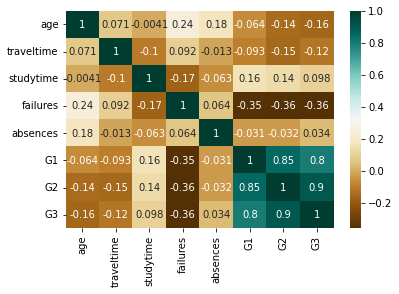

In [87]:
sns.heatmap(Matriz,cmap="BrBG",annot=True)

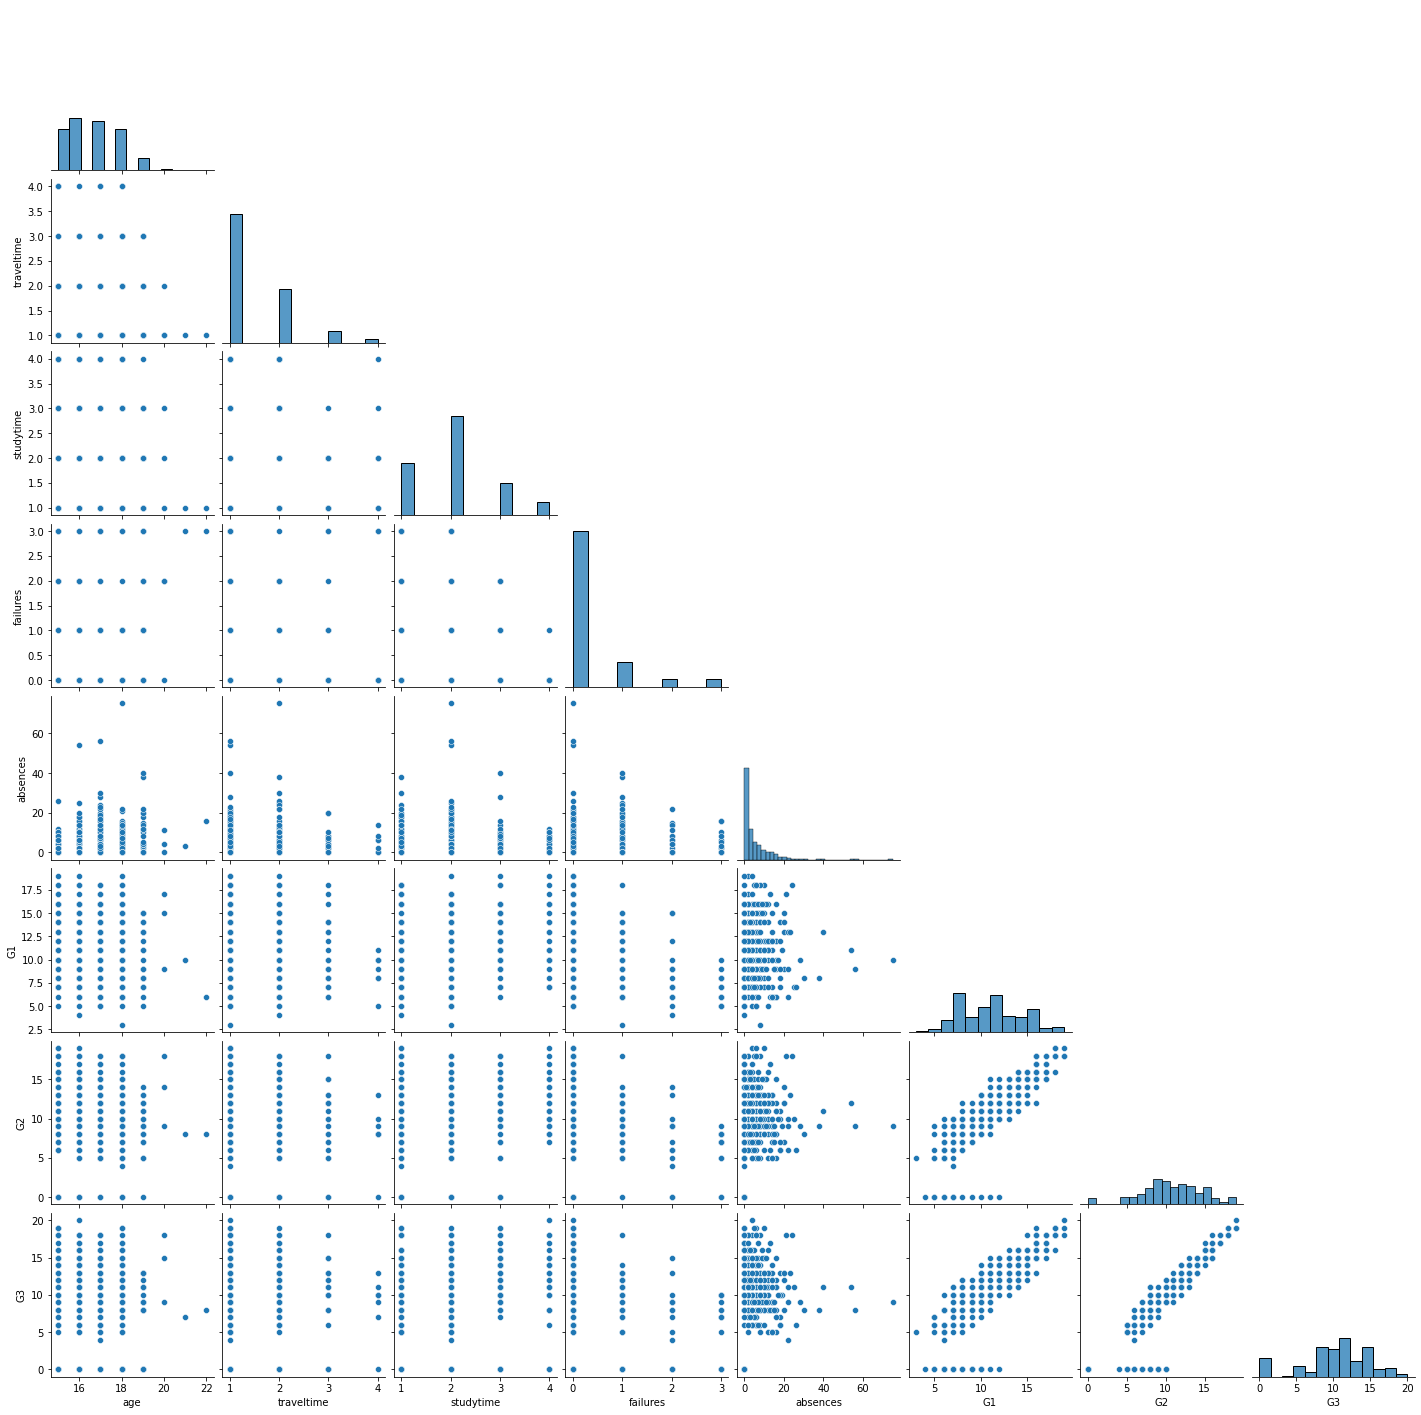

In [91]:
sns.pairplot(Var_cuanti, diag_kind = 'hist', corner = True)

Las calificación del estudiante en el corte 1 y corte 2 presentan un alta asociación positiva con la calificación obtenida en el corte 3, con una correlación de 0.8 y 0.9 respectivamente. el restante de variable presentan correlaciones bajas con la variable de interes, por lo tanto, las variables cuantitativas que se utilizaran en el análisis son las notas de matematicas en
el corte 1 y corte 2, aunque, es necesario tener en cuenta el comportamiento anomalo que se observa en el diagrama de dispersión de estas variables, dado que, se observan algunos puntos con un comportamiento diferente al que presenta la gran mayoria de los datos.

In [92]:
Var_cuali = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health','G3']

In [90]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

En cuanto a la asociación de la variable de interes con las variables cualitativas, se analizan unicamente las que apriori se esperaria que tengan algun tipo de asociación, como lo son, el colegio, sexo, tipo de domicilio, apoyo educativo extra y acceso a internet.

In [99]:
nombres = ['school', 'sex', 'address', 'internet','schoolsup']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


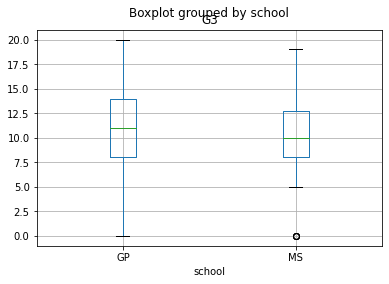

In [100]:
p = nombres[0]
df.loc[:,['G3', nombres[0]]].boxplot(column= 'G3', by = p)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


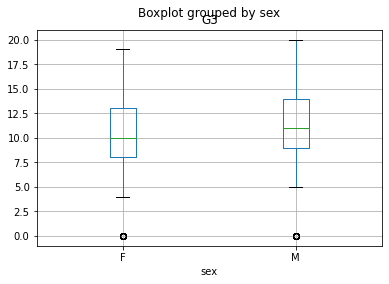

In [101]:
p = nombres[1]
df.loc[:,['G3', nombres[1]]].boxplot(column= 'G3', by = p)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


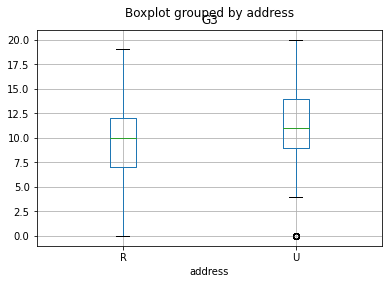

In [102]:
p = nombres[2]
df.loc[:,['G3', nombres[2]]].boxplot(column= 'G3', by = p)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


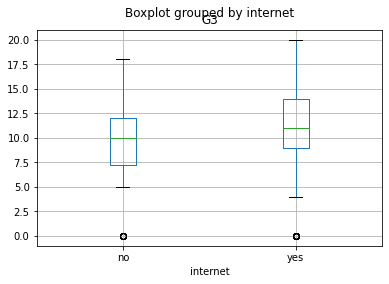

In [103]:
p = nombres[3]
df.loc[:,['G3', nombres[3]]].boxplot(column= 'G3', by = p)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


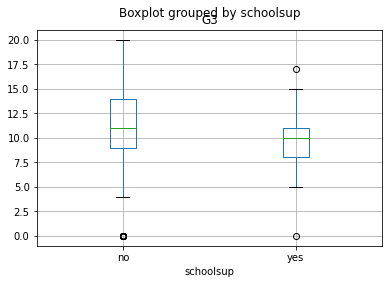

In [104]:
p = nombres[4]
df.loc[:,['G3', nombres[4]]].boxplot(column= 'G3', by = p)

De manera visual, se puede observar que la nota obtenida en el corte en el tercer corte varia dependiendo del colegio, de si tiene internet o no, de si toma clases extra y del tipo de domicilio, por lo tanto, estas seran las variables que seran tenidas en cuenta en el analis, no obstante, se podria realizar todos los posibles graficos Box-plot y hacer una PH para confirmar si realmente hay diferencia en los promedios y con esto concluir asociación entre las variables.

Se tendran en cuenta para el explicar las notas del tercer corte las notas obtenidas en el primer corte, segundo corte, colegio, si tiene internet o no, si toma clases extra y del tipo de domicilio.